In [6]:
import pandas as pd
from pmdarima import auto_arima
import tool
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [7]:
train, test = tool.make_monthly_data('IndexPrices__US2792.xlsx')

In [8]:
# Prophet using all available data
US2792_train, US2792_test = tool.data_process("IndexPrices__US2792.xlsx")
US2792_train.iloc[197,0]
US2792_train = US2792_train[198:].reset_index(drop=True)
US2792_model_obj = Prophet()
US2792_forecast = tool.make_forecast(US2792_model_obj, US2792_train)
tool.timeseries_evaluation_metrics_func(US2792_train.y,US2792_forecast[:len(US2792_train)].yhat)


09:58:27 - cmdstanpy - INFO - Chain [1] start processing
09:58:28 - cmdstanpy - INFO - Chain [1] done processing


Evaluation metric results:-
MSE is : 56.28774733373963
MAE is : 5.208687747537362
RMSE is : 7.502516066876473
MAPE is : 0.14753341281826873
R2 is : 0.5144411945578076
Your model is not good enough. Please adjust it.


In [9]:
tool.timeseries_evaluation_metrics_func(US2792_test.y,US2792_forecast[len(US2792_train):].yhat)

Evaluation metric results:-
MSE is : 499.45366674623824
MAE is : 16.11816422597398
RMSE is : 22.34846005312756
MAPE is : 0.3283143947791859
R2 is : -1.020963974898549
Your model is not good enough. Please adjust it.


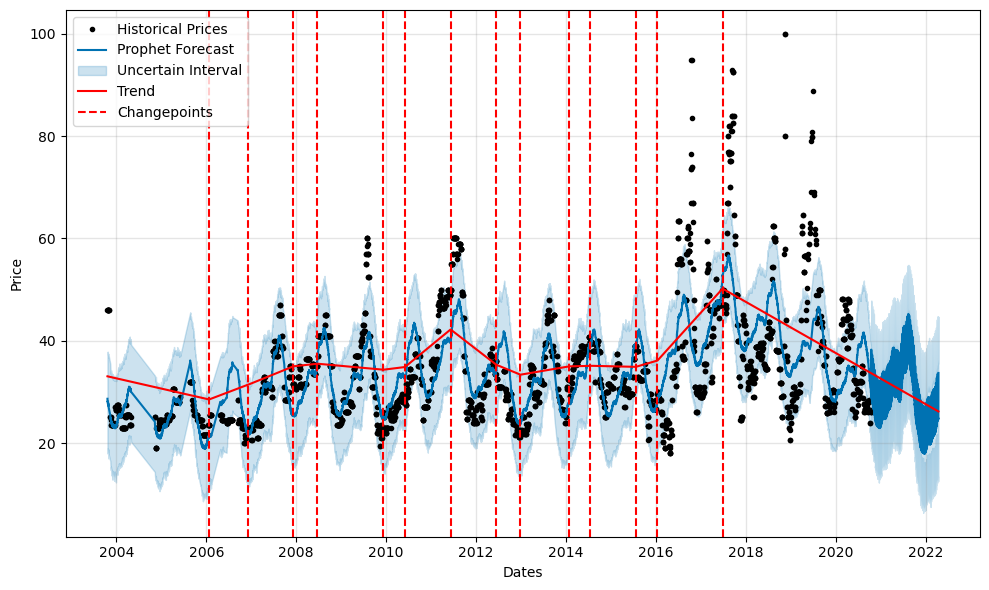

In [10]:
fig = US2792_model_obj.plot(US2792_forecast)
a = add_changepoints_to_plot(fig.gca(), US2792_model_obj, US2792_forecast)
plt.xlabel("Dates")
plt.ylabel("Price")
plt.legend(["Historical Prices", "Prophet Forecast", "Uncertain Interval", "Trend", "Changepoints"],loc='upper left')